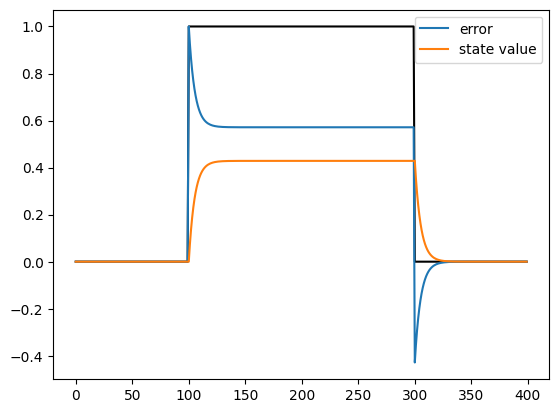

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# This week we will begin covering **supervised learning**

# Hebbian learning: only depends on pre and post (no feedback signal)

# Reinforcement learning: depends on pre and post but also a **how good / how
# bad** feedback signal

# Supervised learning: depends on pre post but also a **precise and
# directional** feedback signal.

# The best place to start looking at this is through the lens of so-called
# state-space models of sensorimotor adaptation.

# TODO: Here, go through and show what a typical visuomotor adaptation
# experiment looks like. Emphasise that the modelling we will apply to this
# behaviour is trial-by-trial (not moment-by-moment as in our neuron models).

# define the rotation applied to the cursor on each trial
r1 = np.zeros(100)
r2 = np.ones(200)
r3 = np.zeros(100)
r = np.concatenate((r1, r2, r3))
# can just get the column in the csv file read. 

# define total number of trials
n = r.shape[0]

# define an array to index trials
t = np.arange(0, n, 1)

# inspect the rotation that we just built
# plt.plot(t, r)
# plt.show()

# Define an array to hold on to **state** values:
# The **state** of the system is the mapping from goal reach location to motor
# command that the system thinks will hit that goal.
x = np.zeros(n)

# Define the parameters that dictate how the state is learned

# Learning rate (alpha): Determines how much is the new state influenced by the
# last error signal.

# Retention rate (beta): Determines how much the new state is influenced by the
# previous state value.

# alpha and beta need not sum to 1.
alpha = 0.075
beta = 0.9

# Define an array to hold on to **error** values:
# The **error** of the system is the signed and graded differences between
# where the system was trying to reach, and where it actually reached.
delta = np.zeros(n)

# simulate the system
for i in range(1, n):
    delta[i-1] = r[i-1] - x[i-1]
    x[i] = beta * x[i-1] + alpha * delta[i-1]

# inspect results
plt.plot(t, r, '-k')
plt.plot(t, delta, label='error')
plt.plot(t, x, label='state value')
plt.legend()
plt.show()
